<b> Jacob Mannix 
<br>COVID19 Kaggle Challenge
<br>Week 02 Tasks

In [31]:
# Dependencies
import pandas as pd
# import numpy as np

# import os
# import json

import re
# import datetime
# from IPython.display import Image

import matplotlib.pyplot as plt
plt.style.use('ggplot')


import seaborn as sns
import random 
from sklearn.manifold import TSNE
from sklearn.cluster import MiniBatchKMeans

In [2]:
# Directory
# %cd /Users/jacobmannix/Box Sync/M.S. Analytics/Analytics Spring/DATA 902/Mittal/Kaggle Covid-19 Challenge/CORD-19-research-challenge
%cd C:\Users\jacob\Box Sync\M.S. Analytics\Analytics Spring\DATA 902\Mittal\Kaggle Covid-19 Challenge\CORD-19-research-challenge

C:\Users\jacob\Box Sync\M.S. Analytics\Analytics Spring\DATA 902\Mittal\Kaggle Covid-19 Challenge\CORD-19-research-challenge


<b> Q1 - Choose 5 papers to understand the general structure of peer reviewed articles

In [4]:
metadata = pd.read_csv('metadata_new.csv') # the new metadata from Kaggle includes the URL for the articles

In [30]:
# metadata.head()
pd.set_option('display.max_colwidth', 1)
metadata['url'].sample(n = 5)

18160    https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5978774/           
618      https://doi.org/10.1101/2020.03.09.983247                       
17788    https://cjasn.asnjournals.org/content/clinjasn/13/4/669.full.pdf
27310    https://doi.org/10.1016/0165-5728(86)90092-5                    
13968    https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6771835/           
Name: url, dtype: object

<b> Q2 - Make a list of objectives you are most interested in rank 1-10. A survey will be sent to gather responses

Objectives (task order default)

7. Sample task with sample submission. Help us understand how geography affects virality.
10. What has been published about information sharing and inter-sectoral collaboration?
2. What do we know about COVID-19 risk factors?
1. What is known about transmission, incubation, and environmental stability?
5. What has been published about medical care?
3. What do we know about virus genetics, origin, and evolution?
4. What do we know about vaccines and therapeutics?
6. What do we know about non-pharmaceutical interventions?
8. What do we know about diagnostics and surveillance?
9. What has been published about ethical and social science considerations?

<b> Q3 - data processing step
- tokenization
- remove punctuation and special characters
    
Inspired from MaksimEkin on Kaggle

In [12]:
# Reading in df_Covid CSV
df_covid = pd.read_csv("df_covid.csv")

<b> Preprocessing

In [13]:
# Dropping Null values
df_covid.dropna(inplace=True)
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19214 entries, 885 to 27662
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   paper_id             19214 non-null  object
 1   abstract             19214 non-null  object
 2   body_text            19214 non-null  object
 3   authors              19214 non-null  object
 4   title                19214 non-null  object
 5   journal              19214 non-null  object
 6   abstract_summary     19214 non-null  object
 7   abstract_word_count  19214 non-null  int64 
 8   body_word_count      19214 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 1.5+ MB


In [14]:
# Limiting number of articles
df_covid = df_covid.head(12500)

In [15]:
# Remove Punctuation
df_covid['body_text'] = df_covid['body_text'].apply(lambda x: re.sub('[^a-zA-z0-9\s]','',x))
df_covid['abstract'] = df_covid['abstract'].apply(lambda x: re.sub('[^a-zA-z0-9\s]','',x))

In [16]:
def lower_case(input_str):
    input_str = input_str.lower()
    return input_str

df_covid['body_text'] = df_covid['body_text'].apply(lambda x: lower_case(x))
df_covid['abstract'] = df_covid['abstract'].apply(lambda x: lower_case(x))

In [17]:
df_covid.head(4)

,paper_id,abstract,body_text,authors,title,journal,abstract_summary,abstract_word_count,body_word_count
885,00142f93c18b07350be89e96372d240372437ed9,dendritic cells dcs are specialized antigenpre...,introduction human beings are constantly expos...,"Geginat, Jens. Nizzoli, Giulia...",Immunity to Pathogens Taught by Specialized<b...,Front Immunol,Dendritic cells (DCs) are specialized<br>anti...,309,5305
886,0022796bb2112abd2e6423ba2d57751db06049fb,dengue has a negative impact in lowand lower m...,pathogens and vectors can now be transported r...,"Viennet, Elvina. Ritchie, Scott A....",Public Health Responses to and Challenges for...,PLoS Negl Trop Dis,Dengue has a negative impact in low-and lower...,276,7288
887,00326efcca0852dc6e39dc6b7786267e1bc4f194,fifteen years ago united nations world leaders...,in addition to preventative care and nutrition...,"Turner, Erin L.. Nielsen, Katie R....",A Review of Pediatric Critical Care in<br>Res...,Front Pediatr,"Fifteen years ago, United Nations world<br>le...",151,7593
888,00352a58c8766861effed18a4b079d1683fec2ec,posttranslational modification of proteins by ...,ubiquitination is a widely used posttranslatio...,"Hodul, Molly. Dahlberg, Caroline L....",Function of the Deubiquitinating Enzyme USP46...,Front Synaptic Neurosci,Posttranslational modification of proteins<br...,148,3156


<b> Only dealing with text

In [18]:
text = df_covid.drop(["paper_id", "abstract", "abstract_word_count", "body_word_count", "authors", "title", "journal", "abstract_summary"], axis=1)

In [19]:
text.head(5)

,body_text
885,introduction human beings are constantly expos...
886,pathogens and vectors can now be transported r...
887,in addition to preventative care and nutrition...
888,ubiquitination is a widely used posttranslatio...
889,the ministry of health of the peoples republic...


In [20]:
# 1d array to 1d list
text_arr = text.stack().tolist()
len(text_arr)

12500

In [21]:
words = []
for ii in range(0,len(text)):
    words.append(str(text.iloc[ii]['body_text']).split(" "))

In [22]:
print(words[0][:10])

['introduction', 'human', 'beings', 'are', 'constantly', 'exposed', 'to', 'a', 'myriad', 'of']


In [23]:
n_gram_all = []

for word in words:
    # get n-grams for the instance
    n_gram = []
    for i in range(len(word)-2+1):
        n_gram.append("".join(word[i:i+2]))
    n_gram_all.append(n_gram)

In [25]:
n_gram_all[0][:10]

['introductionhuman',
 'humanbeings',
 'beingsare',
 'areconstantly',
 'constantlyexposed',
 'exposedto',
 'toa',
 'amyriad',
 'myriadof',
 'ofpathogens']

-------------

In [24]:
# Vectorize with HashingVectorizer

In [25]:
from sklearn.feature_extraction.text import HashingVectorizer

# hash vectorizer instance
hvec = HashingVectorizer(lowercase=False, analyzer=lambda l:l, n_features=2**12)

# features matrix X
X = hvec.fit_transform(n_gram_all)

In [26]:
X.shape

(12500, 4096)

In [27]:
# Seperate train and test set

In [28]:
from sklearn.model_selection import train_test_split

# test set size of 20% of the data and the random seed 42 <3
X_train, X_test = train_test_split(X.toarray(), test_size=0.2, random_state=42)

print("X_train size:", len(X_train))
print("X_test size:", len(X_test), "\n")

X_train size: 10000
X_test size: 2500 



---------

<b> Q4 - the objective is to create a search engine to find papers based on key words
- use regular expression to find one word
- a combination of words

<b> Q5 - Cluster papers

In [29]:
# Dimension Reduction with T-SNE
tsne = TSNE(verbose=1, perplexity=5)
X_embedded = tsne.fit_transform(X_train)

[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 10000 samples in 25.679s...
[t-SNE] Computed neighbors for 10000 samples in 866.857s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.135013
[t-SNE] KL divergence after 250 iterations with early exaggeration: 140.856400
[t-SNE] KL divergence after 1000 iterations: 3.787840


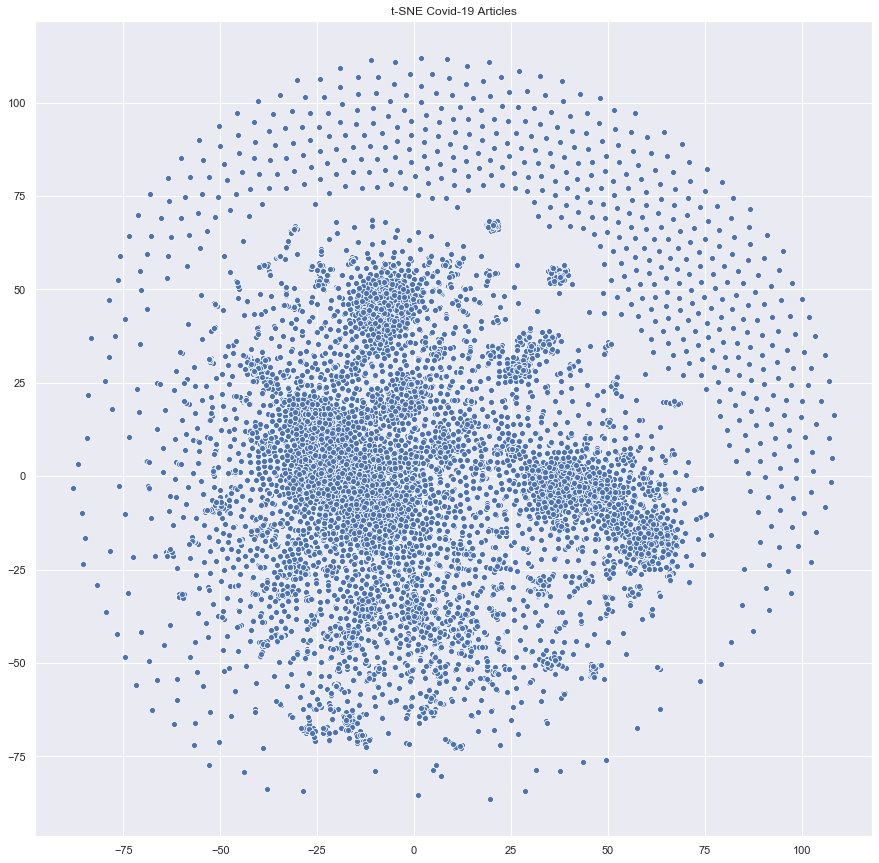

In [32]:
# sns settings
sns.set(rc={'figure.figsize':(15,15)})

# colors
palette = sns.color_palette("bright", 1)

# plot
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], palette=palette)

plt.title("t-SNE Covid-19 Articles")
# plt.savefig("plots/t-sne_covid19.png")
plt.show()

In [33]:
# Clustering with k-means
from sklearn.cluster import KMeans

k = 10
kmeans = KMeans(n_clusters=k, n_jobs=4, verbose=10)
y_pred = kmeans.fit_predict(X_train)

In [34]:
y_train = y_pred

In [35]:
y_test = kmeans.predict(X_test)

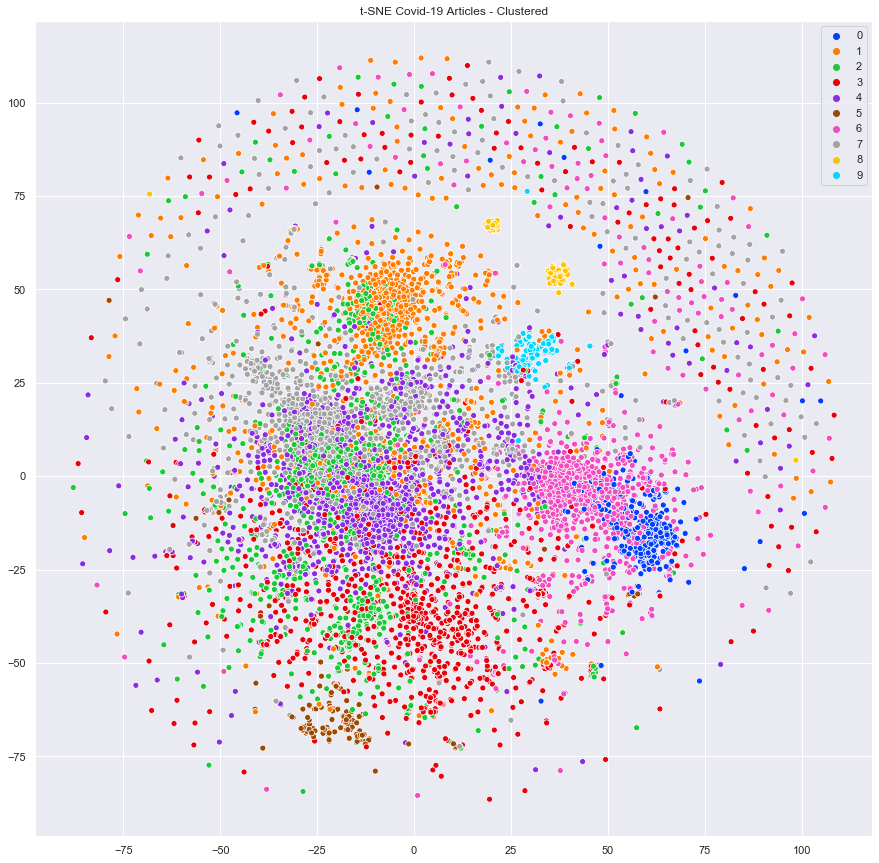

In [36]:
# sns settings
sns.set(rc={'figure.figsize':(15,15)})

# colors
palette = sns.color_palette("bright", len(set(y_pred)))

# plot
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=y_pred, legend='full', palette=palette)
plt.title("t-SNE Covid-19 Articles - Clustered")
# plt.savefig("plots/t-sne_covid19_label.png")
plt.show()

<b> Classify

Helper Function:

In [37]:
# function to print out classification model report
def classification_report(model_name, test, pred):
    from sklearn.metrics import precision_score, recall_score
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import f1_score
    
    print(model_name, ":\n")
    print("Accuracy Score: ", '{:,.3f}'.format(float(accuracy_score(test, pred)) * 100), "%")
    print("     Precision: ", '{:,.3f}'.format(float(precision_score(test, pred, average='micro')) * 100), "%")
    print("        Recall: ", '{:,.3f}'.format(float(recall_score(test, pred, average='micro')) * 100), "%")
    print("      F1 score: ", '{:,.3f}'.format(float(f1_score(test, pred, average='micro')) * 100), "%")

<b> Random Forest

In [38]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# random forest classifier instance
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=4)

# cross validation on the training set 
forest_scores = cross_val_score(forest_clf, X_train, y_train, cv=3, n_jobs=4)

# print out the mean of the cross validation scores
print("Accuracy: ", '{:,.3f}'.format(float(forest_scores.mean()) * 100), "%")

Accuracy:  70.370 %


In [39]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score, recall_score

# cross validate predict on the training set
forest_train_pred = cross_val_predict(forest_clf, X_train, y_train, cv=3, n_jobs=4)

# print precision and recall scores
print("Precision: ", '{:,.3f}'.format(float(precision_score(y_train, forest_train_pred, average='macro')) * 100), "%")
print("   Recall: ", '{:,.3f}'.format(float(recall_score(y_train, forest_train_pred, average='macro')) * 100), "%")

Precision:  81.294 %
   Recall:  61.300 %


In [40]:
# first train the model
forest_clf.fit(X_train, y_train)

# make predictions on the test set
forest_pred = forest_clf.predict(X_test)

In [41]:
# print out the classification report
classification_report("Random Forest Classifier Report (Test Set)", y_test, forest_pred)

Random Forest Classifier Report (Test Set) :

Accuracy Score:  73.000 %
     Precision:  73.000 %
        Recall:  73.000 %
      F1 score:  73.000 %


<b> Vectorize Using Tf-idf with Plain Text

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=2**12)
X = vectorizer.fit_transform(df_covid['body_text'].values)

In [43]:
X.shape

(12500, 4096)

<b> MiniBatchKMeans with Plain text and Tf-idf

In [44]:
from sklearn.cluster import MiniBatchKMeans

k = 10
kmeans = MiniBatchKMeans(n_clusters=k)
y_pred = kmeans.fit_predict(X)

In [45]:
y = y_pred

<b> Dimensionality Reduction with t-SNE (Plain text and Tf-idf)

In [46]:
from sklearn.manifold import TSNE

tsne = TSNE(verbose=1)
X_embedded = tsne.fit_transform(X.toarray())

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 12500 samples in 27.269s...
[t-SNE] Computed neighbors for 12500 samples in 1071.152s...
[t-SNE] Computed conditional probabilities for sample 1000 / 12500
[t-SNE] Computed conditional probabilities for sample 2000 / 12500
[t-SNE] Computed conditional probabilities for sample 3000 / 12500
[t-SNE] Computed conditional probabilities for sample 4000 / 12500
[t-SNE] Computed conditional probabilities for sample 5000 / 12500
[t-SNE] Computed conditional probabilities for sample 6000 / 12500
[t-SNE] Computed conditional probabilities for sample 7000 / 12500
[t-SNE] Computed conditional probabilities for sample 8000 / 12500
[t-SNE] Computed conditional probabilities for sample 9000 / 12500
[t-SNE] Computed conditional probabilities for sample 10000 / 12500
[t-SNE] Computed conditional probabilities for sample 11000 / 12500
[t-SNE] Computed conditional probabilities for sample 12000 / 12500
[t-SNE] Computed conditional probabilities for

<b> Plot t-SNE

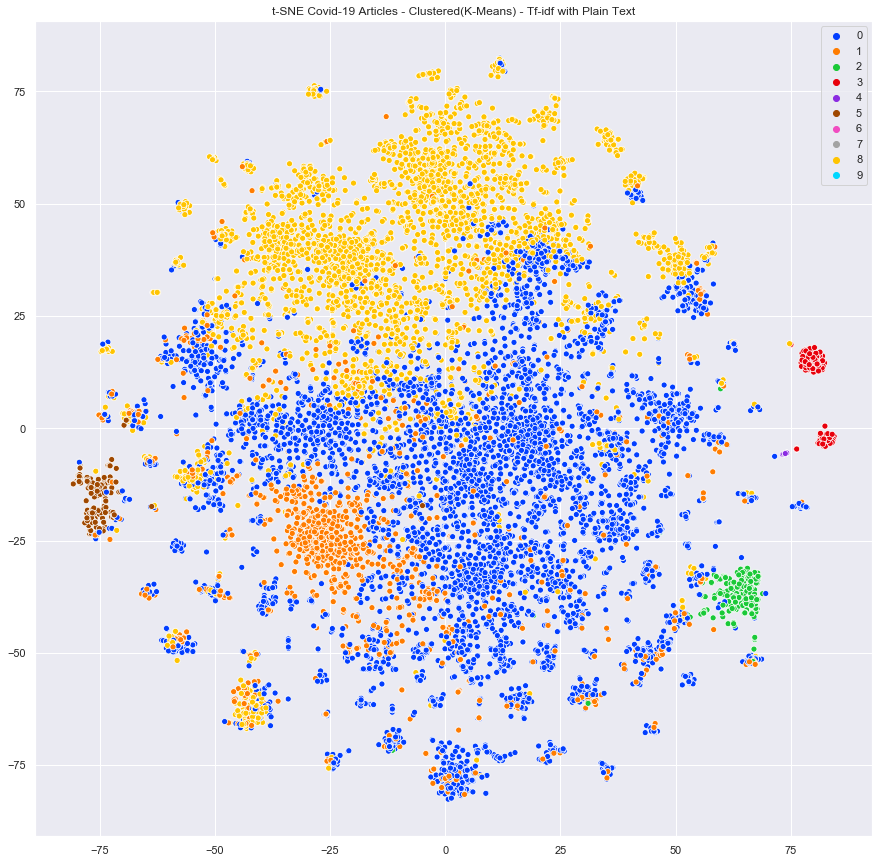

In [47]:
from matplotlib import pyplot as plt
import seaborn as sns

# sns settings
sns.set(rc={'figure.figsize':(15,15)})

# colors
palette = sns.color_palette("bright", len(set(y)))

# plot
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=y, legend='full', palette=palette)
plt.title("t-SNE Covid-19 Articles - Clustered(K-Means) - Tf-idf with Plain Text")
# plt.savefig("plots/t-sne_covid19_label_TFID.png")
plt.show()

<b> Dimensionality Reduction with PCA (Plain text and Tf-idf)

t-SNE doesn't scale well. This is why run-time of this Notebook is about 40 minutes to 1 hour with an average computer. Let's try to see if we dan achive good results with PCA as it scales very well with larger datasets and dimensions:

In [48]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca_result = pca.fit_transform(X.toarray())

<b> Plot PCA

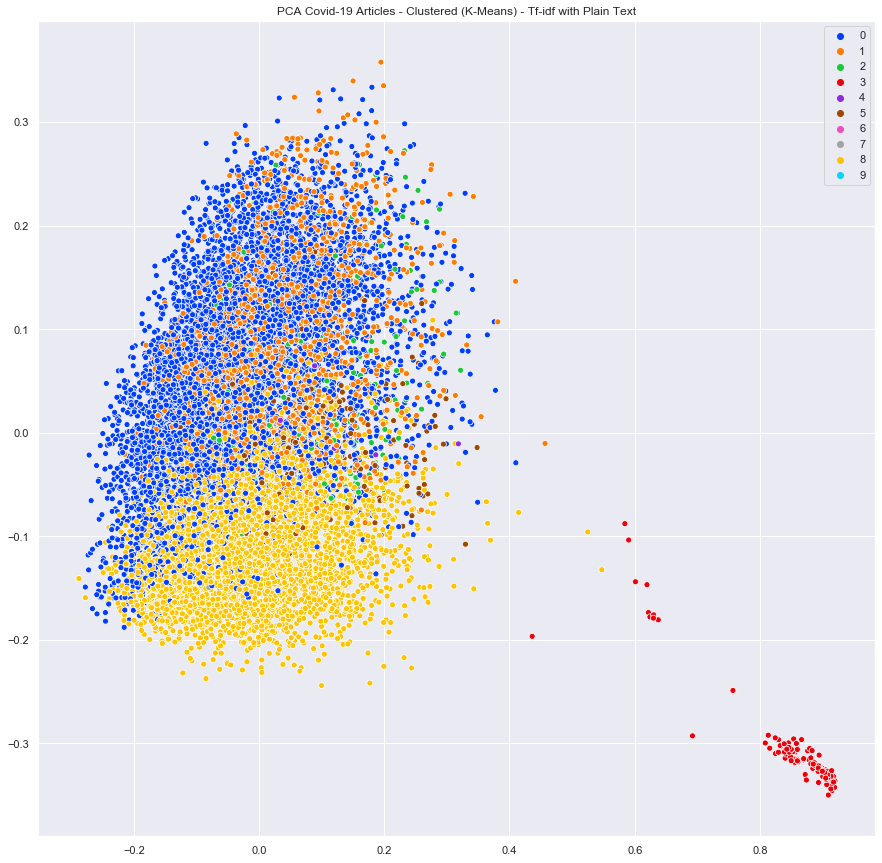

In [49]:
# sns settings
sns.set(rc={'figure.figsize':(15,15)})

# colors
palette = sns.color_palette("bright", len(set(y)))

# plot
sns.scatterplot(pca_result[:,0], pca_result[:,1], hue=y, legend='full', palette=palette)
plt.title("PCA Covid-19 Articles - Clustered (K-Means) - Tf-idf with Plain Text")
# plt.savefig("plots/pca_covid19_label_TFID.png")
plt.show()

<b> 3 dim plot

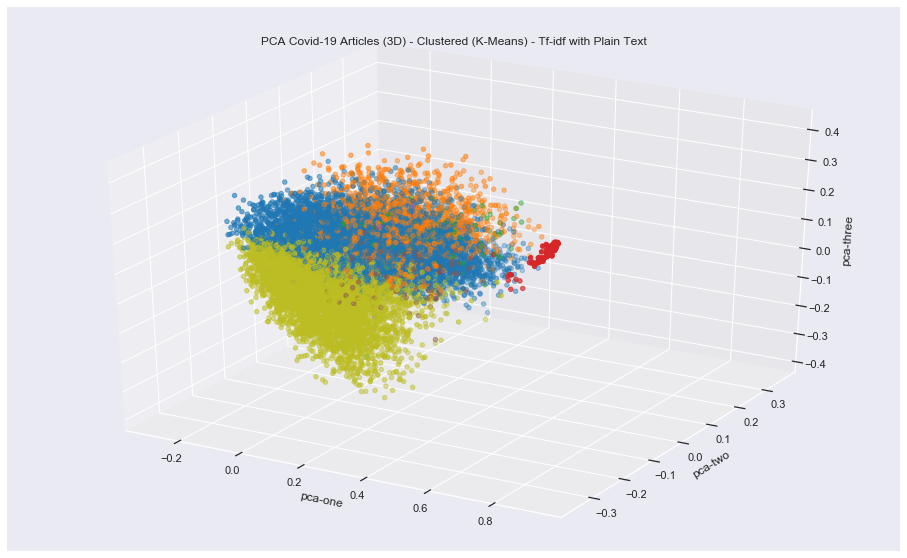

In [50]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=pca_result[:,0], 
    ys=pca_result[:,1], 
    zs=pca_result[:,2], 
    c=y, 
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.title("PCA Covid-19 Articles (3D) - Clustered (K-Means) - Tf-idf with Plain Text")
# plt.savefig("plots/pca_covid19_label_TFID_3d.png")
plt.show()

<b> More Clusters

In [51]:
k = 20
kmeans = MiniBatchKMeans(n_clusters=k)
y_pred = kmeans.fit_predict(X)
y = y_pred

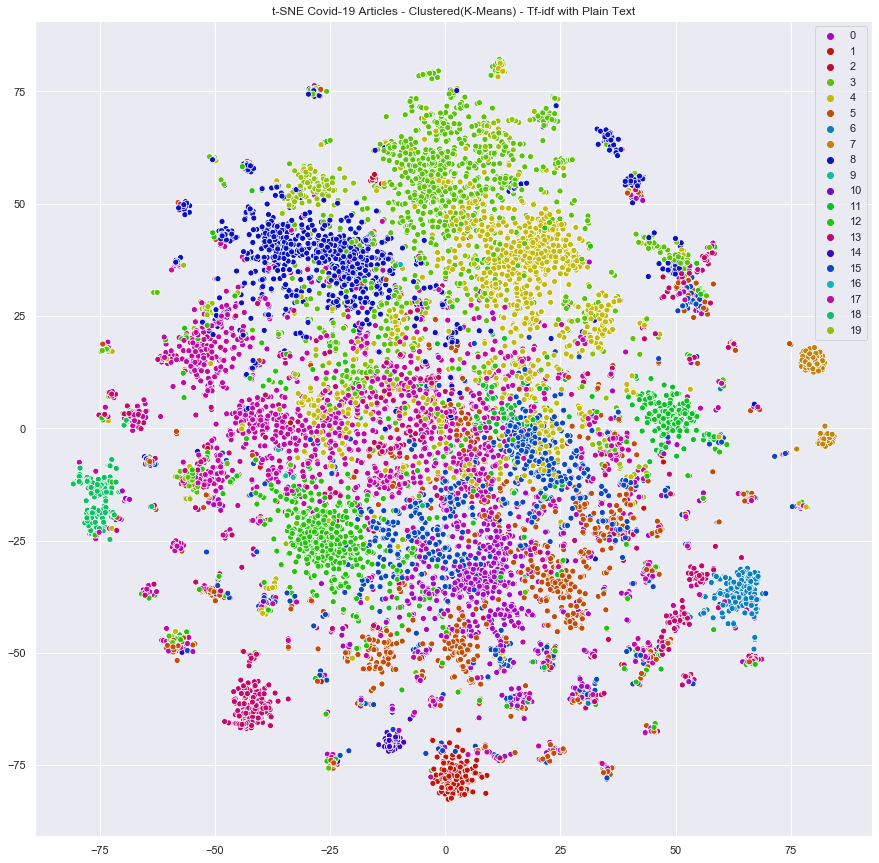

In [52]:
# sns settings
sns.set(rc={'figure.figsize':(15,15)})

# let's shuffle the list so distinct colors stay next to each other
palette = sns.hls_palette(20, l=.4, s=.9)
random.shuffle(palette)

# plot
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=y, legend='full', palette=palette)
plt.title("t-SNE Covid-19 Articles - Clustered(K-Means) - Tf-idf with Plain Text")
# plt.savefig("plots/t-sne_covid19_20label_TFID.png")
plt.show()

<b> Q6 - Topic extraction (opposite of clusters, similar to PCA)

<b> Q7 - Can clustering be done as a second step, after narrowing the scope using step 4

<b> Q8,9,10 - How can 2Vec be used?
- Word2Vec
- Sen2Vec
- Doc2Vec